<a href="https://colab.research.google.com/github/ibribr/DT8807/blob/master/PM2_5_Time_Series_Forecasting_by_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import print_function
import os
import sys
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

In [ ]:
#set current working directory
os.chdir('G:/Practical Time Series')

FileNotFoundError: ignored

In [ ]:
# load your data
from google.colab import files
uploaded = files.upload()

Saving PRSA_data_2010.1.1-2014.12.31.csv to PRSA_data_2010.1.1-2014.12.31.csv


In [ ]:
#Read the dataset into a pandas.DataFrame
df = pd.read_csv('PRSA_data_2010.1.1-2014.12.31.csv')

In [ ]:
print('Shape of the dataframe:', df.shape)

Shape of the dataframe: (43824, 13)


In [ ]:
#Let's see the first five rows of the DataFrame
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [ ]:
# Rows having NaN values in column pm2.5 are dropped.
df.dropna(subset=['pm2.5'], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
print('Shape of the dataframe:', df.shape)

Shape of the dataframe: (41757, 13)


In [ ]:
df['datetime'] = df[['year', 'month', 'day', 'hour']].apply(lambda row: datetime.datetime(year=row['year'], month=row['month'], day=row['day'],
                                                                                          hour=row['hour']), axis=1)
df.sort_values('datetime', ascending=True, inplace=True)

In [ ]:
print('Shape of the dataframe:', df.shape)

Shape of the dataframe: (41757, 14)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Box plot of pm2.5')

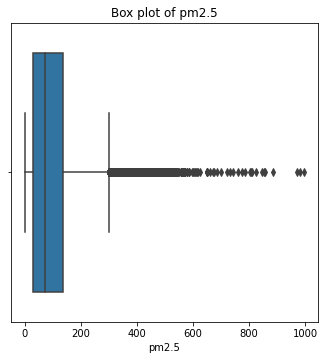

In [ ]:
#Let us draw a box plot to visualize the central tendency and dispersion of PRES
plt.figure(figsize=(5.5, 5.5))
g = sns.boxplot(df['pm2.5'])
g.set_title('Box plot of pm2.5')

In [ ]:
plt.figure(figsize=(5.5, 5.5))
g = sns.tsplot(df['pm2.5'])
g.set_title('Time series of pm2.5')
g.set_xlabel('Index')
g.set_ylabel('pm2.5 readings')

AttributeError: ignored

<Figure size 396x396 with 0 Axes>

In [ ]:
#Let's plot the series for six months to check if any pattern apparently exists.
plt.figure(figsize=(5.5, 5.5))
g = sns.tsplot(df['pm2.5'].loc[df['datetime']<=datetime.datetime(year=2010,month=6,day=30)], color='g')
g.set_title('pm2.5 during 2010')
g.set_xlabel('Index')
g.set_ylabel('pm2.5 readings')

#Let's zoom in on one month.
plt.figure(figsize=(5.5, 5.5))
g = sns.tsplot(df['pm2.5'].loc[df['datetime']<=datetime.datetime(year=2010,month=1,day=31)], color='g')
g.set_title('pm2.5 during Jan 2010')
g.set_xlabel('Index')
g.set_ylabel('pm2.5 readings')

AttributeError: ignored

<Figure size 396x396 with 0 Axes>

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df['scaled_pm2.5'] = scaler.fit_transform(np.array(df['pm2.5']).reshape(-1, 1))

In [ ]:
"""
Let's start by splitting the dataset into train and validation. The dataset's time period if from
Jan 1st, 2010 to Dec 31st, 2014. The first fours years - 2010 to 2013 is used as train and
2014 is kept for validation.
"""
split_date = datetime.datetime(year=2014, month=1, day=1, hour=0)
df_train = df.loc[df['datetime']<split_date]
df_val = df.loc[df['datetime']>=split_date]
print('Shape of train:', df_train.shape)
print('Shape of test:', df_val.shape)

Shape of train: (33096, 15)
Shape of test: (8661, 15)


In [ ]:
#First five rows of train
df_train.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime,scaled_pm2.5
0,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0,2010-01-02 00:00:00,0.129779
1,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0,2010-01-02 01:00:00,0.148893
2,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0,2010-01-02 02:00:00,0.159960
3,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0,2010-01-02 03:00:00,0.182093
4,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0,2010-01-02 04:00:00,0.138833


In [ ]:
#First five rows of validation
df_val.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime,scaled_pm2.5
0,35065,2014,1,1,0,24.0,-20,7.0,1014.0,NW,143.48,0,0,2014-01-01 00:00:00,0.024145
1,35066,2014,1,1,1,53.0,-20,7.0,1013.0,NW,147.50,0,0,2014-01-01 01:00:00,0.053320
2,35067,2014,1,1,2,65.0,-20,6.0,1013.0,NW,151.52,0,0,2014-01-01 02:00:00,0.065392
3,35068,2014,1,1,3,70.0,-20,6.0,1013.0,NW,153.31,0,0,2014-01-01 03:00:00,0.070423
4,35069,2014,1,1,4,79.0,-18,3.0,1012.0,cv,0.89,0,0,2014-01-01 04:00:00,0.079477


In [ ]:
#Reset the indices of the validation set
df_val.reset_index(drop=True, inplace=True)

In [ ]:
"""
The train and validation time series of scaled_pm2.5 is also plotted.
"""

plt.figure(figsize=(5.5, 5.5))
g = sns.tsplot(df_train['scaled_pm2.5'], color='b')
g.set_title('Time series of scaled pm2.5 in train set')
g.set_xlabel('Index')
g.set_ylabel('Scaled pm2.5 readings')

plt.figure(figsize=(5.5, 5.5))
g = sns.tsplot(df_val['scaled_pm2.5'], color='r')
g.set_title('Time series of scaled pm2.5 in validation set')
g.set_xlabel('Index')
g.set_ylabel('Scaled pm2.5 readings')

AttributeError: ignored

<Figure size 396x396 with 0 Axes>

Now we need to generate regressors (X) and target variable (y) for train and validation. 2-D array of regressor and 1-D array of target is created from the original 1-D array of columm standardized_pm2.5 in the DataFrames. For the time series forecasting model, Past seven days of observations are used to predict for the next day. This is equivalent to a AR(7) model. We define a function which takes the original time series and the number of timesteps in regressors as input to generate the arrays of X and y.

In [ ]:
def makeXy(ts, nb_timesteps):
    """
    Input: 
           ts: original time series
           nb_timesteps: number of time steps in the regressors
    Output: 
           X: 2-D array of regressors
           y: 1-D array of target 
    """
    X = []
    y = []
    for i in range(nb_timesteps, ts.shape[0]):
        X.append(list(ts.loc[i-nb_timesteps:i-1]))
        y.append(ts.loc[i])
    X, y = np.array(X), np.array(y)
    return X, y

In [ ]:
X_train, y_train = makeXy(df_train['scaled_pm2.5'], 7)
print('Shape of train arrays:', X_train.shape, y_train.shape)

Shape of train arrays: (33089, 7) (33089,)


In [ ]:
X_val, y_val = makeXy(df_val['scaled_pm2.5'], 7)
print('Shape of validation arrays:', X_val.shape, y_val.shape)

Shape of validation arrays: (8654, 7) (8654,)


The input to RNN layers must be of shape (number of samples, number of timesteps, number of features per timestep). In this case we are modeling only pm2.5 hence number of features per timestep is one. Number of timesteps is seven and number of samples is same as the number of samples in X_train and X_val, which are reshaped to 3D arrays.

In [ ]:
#X_train and X_val are reshaped to 3D arrays
X_train, X_val = X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
print('Shape of arrays after reshaping:', X_train.shape, X_val.shape)

Shape of arrays after reshaping: (33089, 7, 1) (8654, 7, 1)


Now we define the MLP using the Keras Functional API. In this approach a layer can be declared as the input of the following layer at the time of defining the next layer.

In [ ]:
from keras.layers import Dense, Input, Dropout
from keras.layers.recurrent import GRU
from keras.optimizers import SGD
from keras.models import Model
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

In [ ]:
#Define input layer which has shape (None, 7) and of type float32. None indicates the number of instances
input_layer = Input(shape=(7,1), dtype='float32')

The GRU layers are defined for seven timesteps. In this example, two GRU layers are stacked. The first GRU returns the output from each all seven timesteps. This output is a sequence and is fed to the second GRU which returns output only from the last step. The first GRU has sixty four hidden neurons in each timestep. Hence the sequence returned by the first GRU has sixty four features.

In [ ]:
gru_layer1 = GRU(64, input_shape=(7,1), return_sequences=True)(input_layer)
gru_layer2 = GRU(32, input_shape=(7,64), return_sequences=False)(gru_layer1)
dropout_layer = Dropout(0.2)(gru_layer2)
#Finally the output layer gives prediction for the next day's air pressure.
output_layer = Dense(1, activation='linear')(dropout_layer)

The input, dense and output layers will now be packed inside a Model, which is wrapper class for training and making predictions. The box plot of pm2.5 shows the presence of outliers. Hence, mean absolute error (MAE) is used as absolute deviations suffer less fluctuations compared to squared deviations.

The network's weights are optimized by the Adam algorithm. Adam stands for adaptive moment estimation and has been a popular choice for training deep neural networks. Unlike, stochastic gradient descent, adam uses different learning rates for each weight and separately updates the same as the training progresses. The learning rate of a weight is updated based on exponentially weighted moving averages of the weight's gradients and the squared gradients.

In [ ]:
ts_model = Model(inputs=input_layer, outputs=output_layer)
ts_model.compile(loss='mean_absolute_error', optimizer='adam')
ts_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 7, 1)]            0         
_________________________________________________________________
gru_2 (GRU)                  (None, 7, 64)             12672     
_________________________________________________________________
gru_3 (GRU)                  (None, 32)                9312      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 22,017
Trainable params: 22,017
Non-trainable params: 0
_________________________________________________________________


The model is trained by calling the fit function on the model object and passing the X_train and y_train. The training is done for a predefined number of epochs. Additionally, batch_size defines the number of samples of train set to be used for a instance of back propagation.The validation dataset is also passed to evaluate the model after every epoch completes. A ModelCheckpoint object tracks the loss function on the validation set and saves the model for the epoch, at which the loss function has been minimum.

In [ ]:
save_weights_at = os.path.join('keras_models', 'PRSA_data_PM2.5_GRU_weights.{epoch:02d}-{val_loss:.4f}.hdf5')
save_best = ModelCheckpoint(save_weights_at, monitor='val_loss', verbose=0,
                            save_best_only=True, save_weights_only=False, mode='min',
                            period=1)
ts_model.fit(x=X_train, y=y_train, batch_size=16, epochs=20,
             verbose=1, callbacks=[save_best], validation_data=(X_val, y_val),
             shuffle=True)

Epoch 1/20
2069/2069 [==============================] - 54s 14ms/step - loss: 0.0220 - val_loss: 0.0118
Epoch 2/20
2069/2069 [==============================] - 27s 13ms/step - loss: 0.0151 - val_loss: 0.0127
Epoch 3/20
2069/2069 [==============================] - 27s 13ms/step - loss: 0.0154 - val_loss: 0.0122
Epoch 4/20
2069/2069 [==============================] - 27s 13ms/step - loss: 0.0151 - val_loss: 0.0129
Epoch 5/20
2069/2069 [==============================] - 27s 13ms/step - loss: 0.0150 - val_loss: 0.0132
Epoch 6/20
2069/2069 [==============================] - 27s 13ms/step - loss: 0.0151 - val_loss: 0.0123
Epoch 7/20
2069/2069 [==============================] - 27s 13ms/step - loss: 0.0150 - val_loss: 0.0119
Epoch 8/20
2069/2069 [==============================] - 26s 13ms/step - loss: 0.0149 - val_loss: 0.0123
Epoch 9/20
2069/2069 [==============================] - 27s 13ms/step - loss: 0.0149 - val_loss: 0.0124
Epoch 10/20
2069/2069 [==============================] - 27s 13m

Prediction are made for the pm2.5 from the best saved model. The model's predictions, which are on the standardized pm2.5, are inverse transformed to get predictions of original pm2.5.

In [ ]:
best_model = load_model(os.path.join('keras_models', 'PRSA_data_PM2.5_GRU_weights.20-0.0116.hdf5'))
preds = best_model.predict(X_val)
pred_pm25 = scaler.inverse_transform(preds)
pred_pm25 = np.squeeze(pred_pm25)

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(df_val['pm2.5'].loc[7:], pred_pm25)
print('MAE for the validation set:', round(mae, 4))

MAE for the validation set: 11.5259


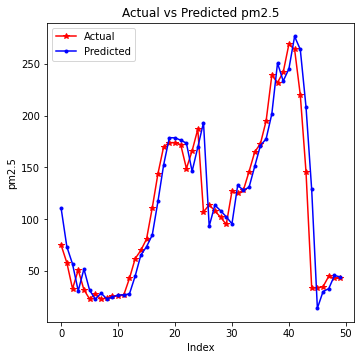

In [ ]:
#Let's plot the first 50 actual and predicted values of pm2.5.
plt.figure(figsize=(5.5, 5.5))
plt.plot(range(50), df_val['pm2.5'].loc[7:56], linestyle='-', marker='*', color='r')
plt.plot(range(50), pred_pm25[:50], linestyle='-', marker='.', color='b')
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted pm2.5')
plt.ylabel('pm2.5')
plt.xlabel('Index')
plt.savefig('B07887_05_12.png', format='png', dpi=300)